# 数据读取

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats

# 生成样本数据
df = pd.read_excel('..\evaluation\棉花产量论文作业的数据.xlsx')
df.head(20)

,年份,单产,种子费,化肥费,农药费,机械费,灌溉费
0,1990,1017.0,106.05,495.15,305.10,45.90,56.10
1,1991,1036.5,113.55,561.45,343.80,68.55,93.30
2,1992,792.0,104.55,584.85,414.00,73.20,104.55
3,1993,861.0,132.75,658.35,453.75,82.95,107.55
4,1994,901.5,174.30,904.05,625.05,114.00,152.10
5,1995,922.5,230.40,1248.75,834.45,143.85,176.40
6,1996,916.5,238.20,1361.55,720.75,165.15,194.25
7,1997,976.5,260.10,1337.40,727.65,201.90,291.75
8,1998,1024.5,270.60,1195.80,775.50,220.50,271.35
9,1999,1003.5,286.20,1171.80,610.95,195.00,284.55


In [20]:
targetColumn = df[['单产','灌溉费']]
targetColumn.head(20)

,单产,灌溉费
0,1017.0,56.10
1,1036.5,93.30
2,792.0,104.55
3,861.0,107.55
4,901.5,152.10
5,922.5,176.40
6,916.5,194.25
7,976.5,291.75
8,1024.5,271.35
9,1003.5,284.55


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


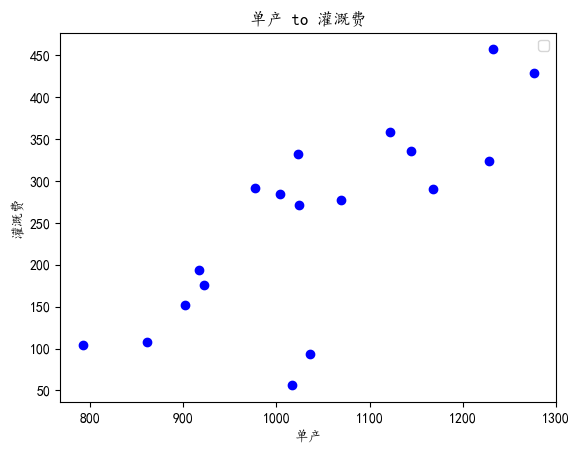

In [21]:

# 绘制散点图
plt.rcParams['font.family'] = 'KaiTi'
plt.scatter(df['单产'], df['灌溉费'], c='blue')

# 添加标签和标题
plt.xlabel('单产')
plt.ylabel('灌溉费')
plt.title('单产 to 灌溉费')

# 添加图例
plt.legend()

# 显示图形
plt.show()


# Step1. 最小二乘法获得参数以及回归预测模型

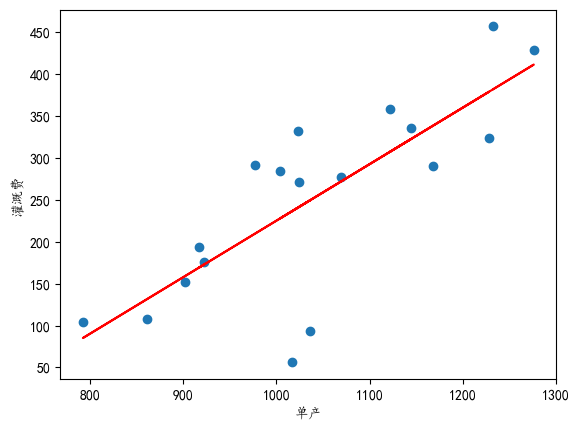

截距: [-448.09243626]
系数: [[0.67324966]]
线性回归方程为：y =  [-448.09243626] + x* [[0.67324966]]


In [22]:
X = df[['单产']]
Y = df[['灌溉费']]

# 内置了最小二乘法以及协方差等
model = LinearRegression()
model.fit(X, Y)

# 模型可视化
plt.scatter(X,Y)
plt.plot(X,model.predict(X),color='red')
plt.xlabel('单产')
plt.ylabel('灌溉费')
plt.show()

#查看系数,截距：线性回归方程构造
# 获取截距
intercept = model.intercept_
# 获取斜率系数，即自变量的权重
coefficients = model.coef_
print('截距:', intercept)
print('系数:', coefficients)
print('线性回归方程为：y = ',intercept,'+ x*',coefficients)


## 一元多次线性回归，转化为曲线

- 有3个数：第1个数0对应X_中常数项的系数；第2个数对应X_中一次项（x）的系数，即系数b；第3个数对应X_中二次项（x^2）的系数，即系数a。
- 截距，常数项c

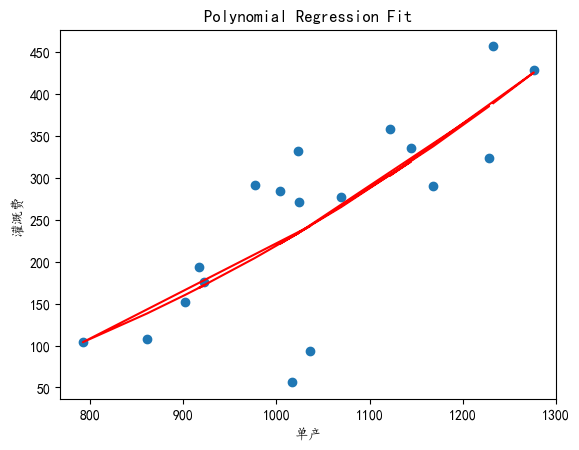

截距: -15.330714369855855
系数: [ 0.         -0.16783883  0.00040218]
线性回归方程为：y =  -15.330714369855855  + x* -0.16783882860146457 + X^2* 0.0004021812823476745


In [27]:
# 用于增加一个多次项内容的模块PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
 
# 用于增加一个多次项内容的模块PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

# 设置最高次项为二次项，为生成二次项数据（x^2）做准备
X_ = poly_reg.fit_transform(X)

model2 = LinearRegression()
model2.fit(X_, Y)

# 创建一个新的图表
plt.figure()
plt.scatter(X, Y)
plt.plot(X, model2.predict(X_), color='r')
plt.xlabel('单产')
plt.ylabel('灌溉费')
plt.title('Polynomial Regression Fit')
plt.show()

# 获取截距
intercept = model2.intercept_[0]
# 获取斜率系数，即自变量的权重
coefficients = model2.coef_[0]
print('截距:', intercept)
print('系数:', coefficients)
print('线性回归方程为：y = ',intercept,' + x*',coefficients[1],'+ X^2*',coefficients[2])

# Step2. 计算误差

In [36]:
from sklearn.metrics import r2_score

# 计算均方误差
mse = mean_squared_error(Y, Y_pred)
#残差标准误
se = np.sqrt(mse)
print('均方误差为：', mse)
print('残差标准误为：', se)

# 计算R^2
r2 = r2_score(Y,model.predict(X))
print("R^2 = ",r2)



均方误差为： 5114.98518390249
残差标准误为： 71.51912460246203
R^2 =  0.6056473214252043


# Step3. 计算置信区间和预测区间

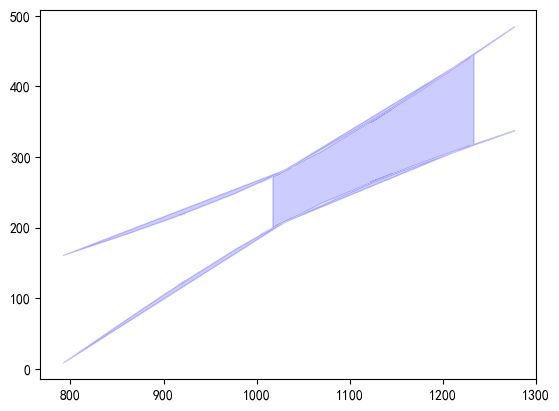

In [38]:
# 计算置信区间
n = len(X)
X_mean = np.mean(X)
t_value = stats.t.ppf(0.975, df=n-2)  # 95% 置信区间，双侧 t 分布的临界值

# 置信区间的上下界
plt.fill_between(X.values.flatten(), ci_lower.values.flatten(), ci_upper.values.flatten(), color='blue', alpha=0.2, label='置信区间')

# Step4. 显著性检验

根据下列代码，为我添加计算置信区间，预测区间以及显著性检验中的线性关系检验和回归系数的显著性检验的代码：X = df[['单产']]
Y = df[['灌溉费']]

内置了最小二乘法以及协方差等
model = LinearRegression()
model.fit(X, Y)

模型可视化
plt.scatter(X,Y)
plt.plot(X,model.predict(X),color='red')
plt.xlabel('单产')
plt.ylabel('灌溉费')
plt.show()

查看系数,截距：线性回归方程构造
获取截距
intercept = model.intercept_
获取斜率系数，即自变量的权重
coefficients = model.coef_
print('截距:', intercept)
print('系数:', coefficients)
print('线性回归方程为：y = ',intercept,'+ x*',coefficients)